<a id="top"></a>
# Rolling Average and Plotting Examples
## Contents
* [Loading Data with `glob`](#glob)
* [Taking a Rolling Mean with Different Window Sizes](#rolling)
* [Plotting](#plotting)

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob

<a id="glob"></a>
## Loading Data with `glob`
[Top](#top)

Create some CSV files of random data

In [2]:
for i in range(10):
    df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
    df.to_csv('test_data/random_data_{}.csv'.format(i+1), index=False)

Find files that match a pattern using `glob`

In [3]:
data_dir = 'test_data/'
data_files = glob(data_dir + '*.csv')
data_files

['test_data/random_data_9.csv',
 'test_data/random_data_8.csv',
 'test_data/random_data_10.csv',
 'test_data/random_data_6.csv',
 'test_data/random_data_7.csv',
 'test_data/random_data_5.csv',
 'test_data/random_data_4.csv',
 'test_data/random_data_1.csv',
 'test_data/random_data_3.csv',
 'test_data/random_data_2.csv']

Load all data files into a list of dataframes using list comprehension

In [4]:
list_of_dataframes = [pd.read_csv(f) for f in data_files]

Concatenate all dataframes into a single dataframe

In [5]:
all_datasets = pd.concat(list_of_dataframes)

Do all of the above neatly, in one line of code

In [6]:
all_datasets = pd.concat([pd.read_csv(f) for f in glob(data_dir + '*.csv')])
all_datasets.sample(3)

,A,B,C,D
43,71,98,78,29
73,13,35,14,23
69,91,61,33,70


<a id="rolling"></a>
## Taking a Rolling Mean with Different Window Sizes
[Top](#top)

Create some new, slightly less random data

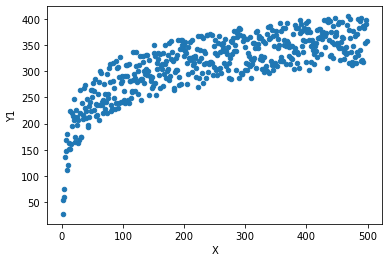

In [7]:
import math
import random

x = range(1, 500)
y1 = [50*math.log(x) + random.random()*100 for x in x]
y2 = [60*math.log(x) + random.random()*100 for x in x]

data = pd.DataFrame(
    {"X": x,
     "Y1": y1,
     "Y2": y2})

# let's take a look
data.plot.scatter('X', 'Y1');

Rolling mean

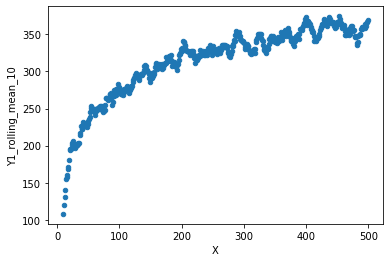

In [8]:
data.dropna(inplace=True) # not needed here, but may be useful for less pristine data

data['Y1_rolling_mean_10'] = data['Y1'].rolling(window=10).mean()
data['Y1_rolling_mean_30'] = data['Y1'].rolling(window=30).mean()
data['Y2_rolling_mean_30'] = data['Y2'].rolling(window=30).mean()

data.plot.scatter('X', 'Y1_rolling_mean_10');

<a id="plotting"></a>
## Plotting
[Top](#top)

Visualize the rolling mean alongside the raw data

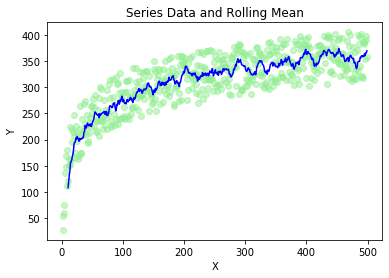

In [9]:
x = data['X']
y1 = data['Y1']
y2 = data['Y1_rolling_mean_10']

plt.scatter(x, y1, alpha=0.5, c='lightgreen')
plt.plot(x, y2, c='blue')
plt.title('Series Data and Rolling Mean')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Making prettier plots
...is quite easy by setting figure size grids, labels, legend, etc..   
  
For comparison, let's display rolling means of all series

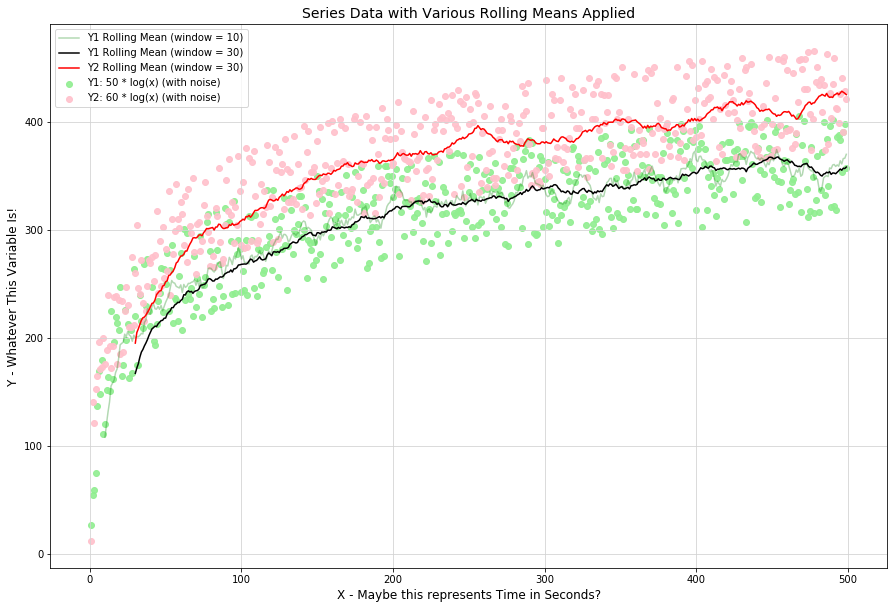

In [10]:
# assign the series values
x = data['X']
y1 = data['Y1']
y2 = data['Y2']
y3 = data['Y1_rolling_mean_10']
y4 = data['Y1_rolling_mean_30']
y5 = data['Y2_rolling_mean_30']


plt.figure(figsize=(15,10))

plt.scatter(x, y1, alpha=0.9, c='lightgreen', label='Y1: 50 * log(x) (with noise)')  # Y1 raw data   - light green
plt.scatter(x, y2, alpha=0.9, c='pink', label='Y2: 60 * log(x) (with noise)')        # Y2 raw data   - pink
plt.plot(x, y3, alpha=0.3, c='green', label='Y1 Rolling Mean (window = 10)')         # Y1 rolling 10 - green
plt.plot(x, y4, c='black', label='Y1 Rolling Mean (window = 30)')                    # Y1 rolling 30 - black
plt.plot(x, y5, c='red', label='Y2 Rolling Mean (window = 30)')                      # Y2 rolling 30 - red

plt.title('Series Data with Various Rolling Means Applied', fontsize=14)
plt.xlabel('X - Maybe this represents Time in Seconds?', fontsize=12)
plt.ylabel('Y - Whatever This Variable Is!', fontsize=12)
plt.legend()
plt.grid(color='lightgrey') # can use any standard web color, or a hex-code (e.g. '#DDAAFF')
plt.show()